In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from pandas import datetime
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

In [2]:
df = pd.read_csv('E://DS/BHN/GC_Traffic.txt', sep='\t')
df.Date = df.Date.apply(lambda x: x.split()[0]).apply(lambda x: datetime.strptime(x,'%d/%m/%y'))
df.columns = ['Date', 'Sales']
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Date,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00
Sales,2093576,2397260,2173039,2051240,1954117,1923592,1927622,2074300,2121106,1802039


In [3]:
df.set_index('Date', inplace=True)
df.head(10).transpose()

Date,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-03 00:00:00,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00
Sales,2093576,2397260,2173039,2051240,1954117,1923592,1927622,2074300,2121106,1802039


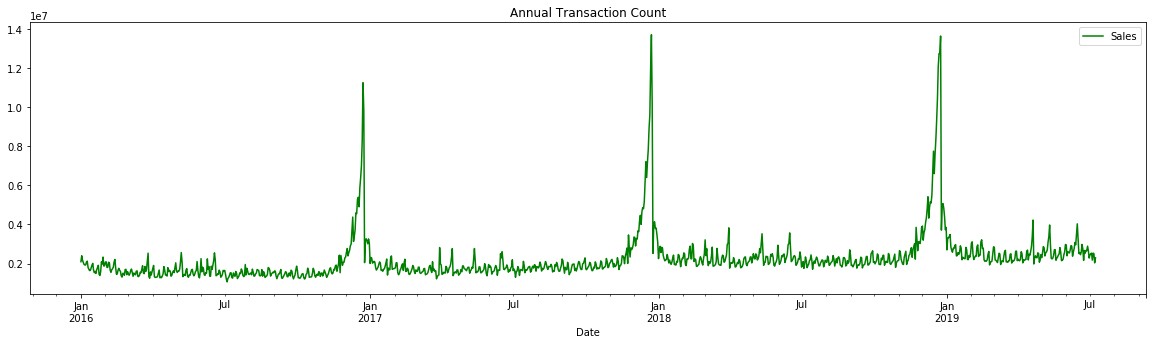

In [4]:
df.plot(figsize=(20,5), title='Annual Transaction Count', color='green')
plt.show()

#### Segregated View

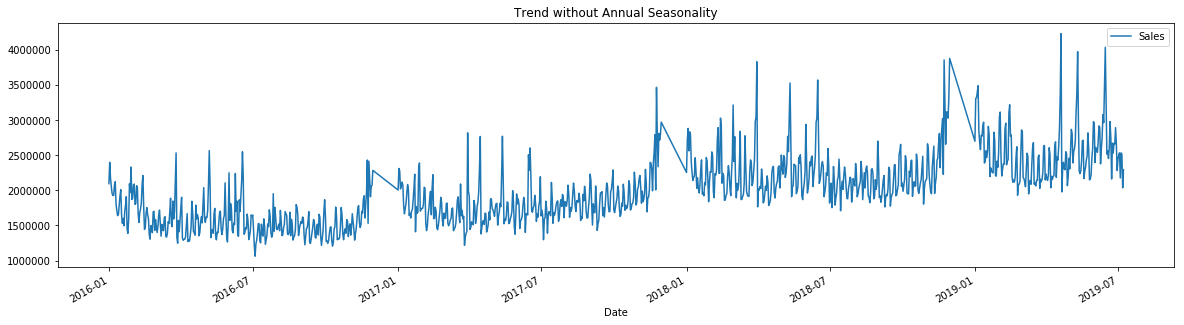

In [5]:
df[df.index.month<12].plot(figsize=(20,5), title='Trend without Annual Seasonality')
plt.show()

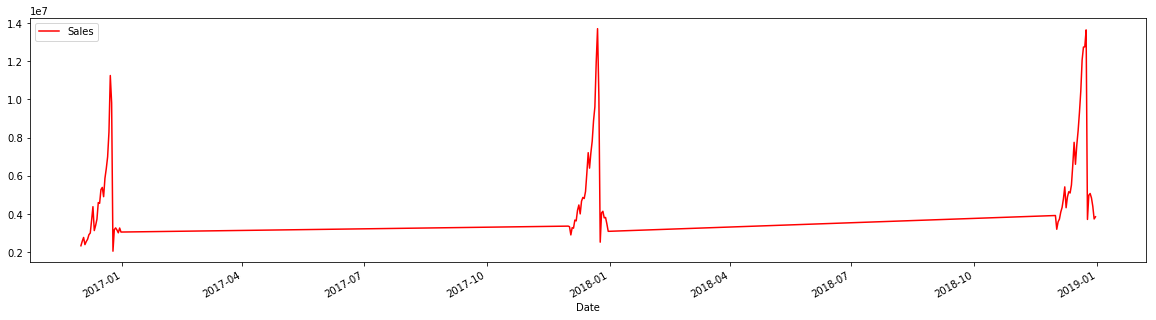

In [6]:
df[df.index.month==12].plot(figsize=(20,5), color='red')
plt.show()

#### Spread of Data

In [7]:
annual_desc =pd.DataFrame()
for j in range(2016, 2019):
    for i in range(1, 12):      
        annual_desc = annual_desc.append(df[(df.index.month==i) & (df.index.year==j)].describe().transpose())
annual_desc['month'] = [i for i in range(1,12)]*3
annual_desc['year' ] = ['2016']*11 + ['2017']*11 + ['2018']*11 
annual_desc.set_index(['year','month'], inplace=True)
annual_desc


count          mean            std        min         25%  \
year month                                                              
2016 1       31.0  1.853529e+06  251659.994864  1385758.0  1650810.50   
     2       29.0  1.704199e+06  244452.765030  1303502.0  1496444.00   
     3       31.0  1.577053e+06  255806.362039  1246581.0  1417222.50   
     4       30.0  1.521105e+06  213031.160566  1269268.0  1341017.00   
     5       31.0  1.599962e+06  282976.443247  1264411.0  1399015.00   
     6       30.0  1.677701e+06  322452.456552  1298305.0  1428603.50   
     7       31.0  1.442465e+06  185554.228795  1061345.0  1313707.50   
     8       31.0  1.503507e+06  140917.538597  1290316.0  1373975.50   
     9       30.0  1.459923e+06  161151.633677  1214406.0  1332059.50   
     10      31.0  1.423335e+06  152260.986708  1204635.0  1295529.00   
     11      30.0  1.739137e+06  309467.518616  1289880.0  1515037.75   
2017 1       31.0  1.894845e+06  247273.194517  1408754.0  1703293.50   
     2       28.0  1.717487e+06  209830.024083  1425011.0  1560439.50   
     3       31.0  1.656003e+06  287609.804131  1216615.0  1509654.00   
     4       30.0  1.693528e+06  290350.236153  1377024.0  1511155.25   
     5       31.0  1.747987e+06  266586.653519  1373224.0  1590252.50   
     6       30.0  1.815077e+06  282596.365081  1400142.0  1651443.50   
     7       31.0  1.710865e+06  163532.422196  1295859.0  1624112.50   
     8       31.0  1.815368e+06  148614.397822  1568931.0  1697764.50   
     9       30.0  1.846990e+06  224099.179409  1428964.0  1691105.00   
     10      31.0  1.858126e+06  160044.126658  1626497.0  1741989.00   
     11      30.0  2.283172e+06  415853.717202  1691722.0  1988042.25   
2018 1       31.0  2.263976e+06  275485.358969  1836420.0  2078199.00   
     2       28.0  2.270076e+06  320565.058350  1856533.0  2015185.25   
     3       31.0  2.328764e+06  470200.354328  1866955.0  1961452.50   
     4       30.0  2.054535e+06  176597.323017  1763210.0  1946988.00   
     5       31.0  2.331420e+06  348209.306525  1866277.0  2057565.50   
     6       30.0  2.384442e+06  369300.906525  1908313.0  2142362.50   
     7       31.0  2.047315e+06  181735.778479  1707227.0  1885020.50   
     8       31.0  2.121956e+06  198931.162960  1821441.0  1956540.50   
     9       30.0  2.088721e+06  241817.797575  1761826.0  1920606.00   
     10      31.0  2.150500e+06  195674.491469  1802401.0  2008762.50   
     11      30.0  2.633169e+06  516909.068397  1950308.0  2225860.25   

                  50%         75%        max  
year month                                    
2016 1      1888183.0  2029597.50  2397260.0  
     2      1681686.0  1808490.00  2208578.0  
     3      1527828.0  1634800.00  2529880.0  
     4      1485635.0  1663589.75  2035916.0  
     5      1560269.0  1668993.00  2562039.0  
     6      1599959.0  1834926.25  2545883.0  
     7      1416690.0  1523662.00  1950432.0  
     8      1477628.0  1613363.50  1794726.0  
     9      1462257.0  1579195.00  1865440.0  
     10     1387983.0  1487245.00  1760523.0  
     11     1669199.5  1917240.00  2429359.0  
2017 1      1808687.0  2063970.50  2387119.0  
     2      1691808.5  1842071.50  2220226.0  
     3      1601786.0  1741752.50  2815591.0  
     4      1589490.5  1820105.00  2764087.0  
     5      1683205.0  1818473.00  2767463.0  
     6      1774982.5  1866433.50  2601096.0  
     7      1695832.0  1837247.50  2110981.0  
     8      1829777.0  1940645.00  2101398.0  
     9      1802259.5  2005116.50  2287976.0  
     10     1815908.0  1981900.00  2256420.0  
     11     2185563.0  2504912.00  3463104.0  
2018 1      2207098.0  2425927.50  2878763.0  
     2      2239270.0  2382142.00  3025699.0  
     3      2155461.0  2432033.50  3826983.0  
     4      2031844.5  2191057.75  2346103.0  
     5      2324182.0  2479246.50  3524873.0  
     6      2342903.5  2479418.00  3567171.0  
     7      2038390.0  2168620.50  2442074.0  

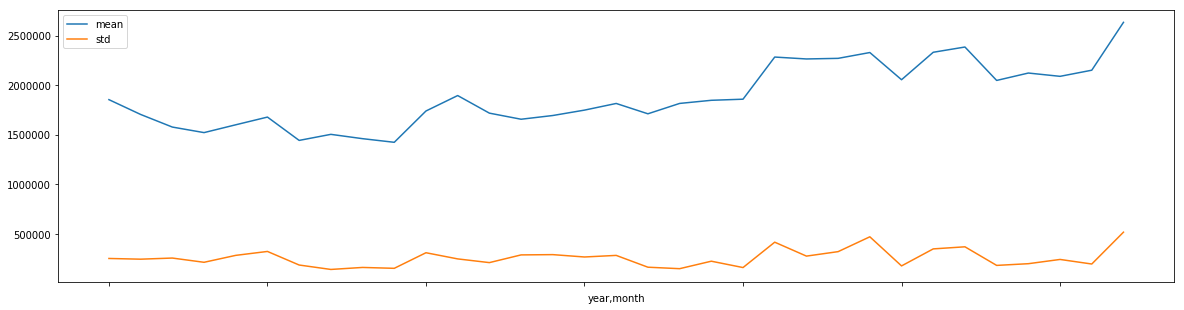

In [8]:
annual_desc[['mean', 'std']].plot(figsize=(20,5))
plt.show()

In [9]:
annual_desc = pd.DataFrame()
for i in range(2016,2019):
    annual_desc = annual_desc.append(df[(df.index.month==12) & (df.index.year==i)].describe().transpose())
annual_desc['year']=[2016, 2017, 2018]
annual_desc.set_index('year', inplace=True)
annual_desc

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2016,31.0,4.316142e+06,2.233792e+06,2045569.0,2955358.5,3267285.0,5090793.5,11257897.0
2017,31.0,5.470715e+06,2.825554e+06,2519000.0,3554544.0,4190314.0,6801140.5,13714689.0
2018,31.0,6.340032e+06,3.074729e+06,3195789.0,4211782.0,5070313.0,7680618.5,13649296.0


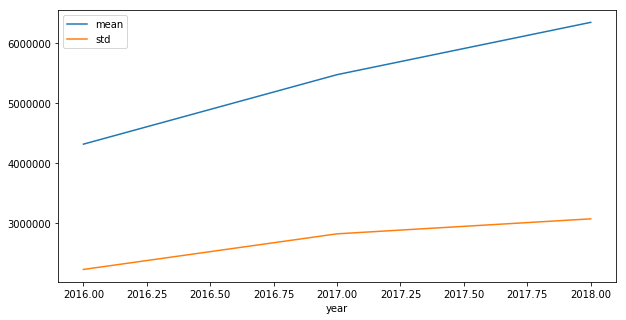

In [10]:
annual_desc[['mean', 'std']].plot(figsize=(10,5))
plt.show()

**To do**
- Treat Annual & Monthly Seasonality
- Make Data Stationary

**Strategies:**
- Differentiation
- Transformation
- Annual Seasonality Treatment + Differentiation/Transformation

In [11]:
from statsmodels.tsa.stattools import adfuller
def check_stationary(df_column):
    if adfuller(df_column)[1] <= 0.5:
        print('Stationary Data')
    else:
        print('Non Stationary Data')

#### Differentiation

Stationary Data
None


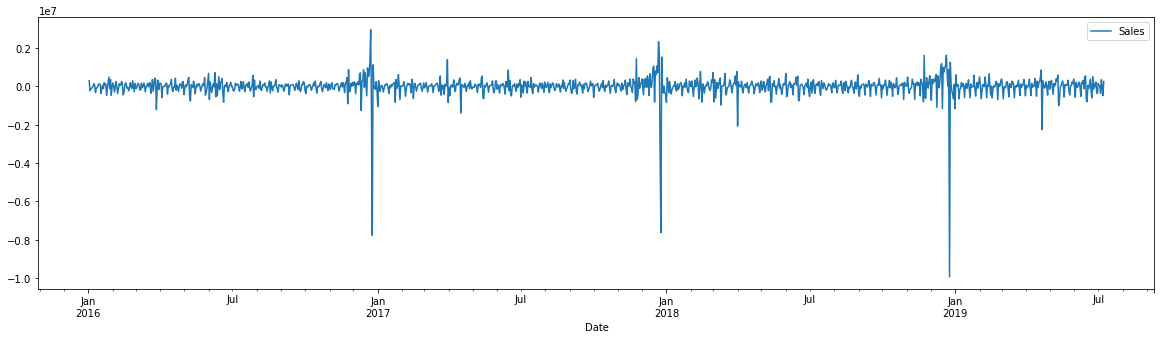

In [12]:
df1 = df.copy()

df1 = df1.diff(periods=1)
print(check_stationary(df1.Sales[1:]))

df1.plot(figsize=(20,5))
plt.show()


Stationary Data
None


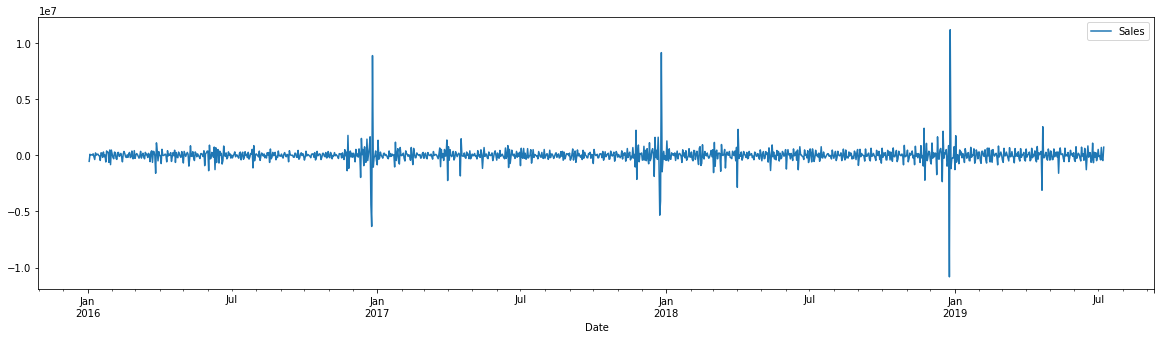

In [13]:
df1 = df1.diff(periods=1)
print(check_stationary(df1.Sales[2:]))

df1.plot(figsize=(20,5))
plt.show()


#### Transformation (Box-Coxx)

In [14]:
df2 = df.copy()

from scipy import stats
fitted_data, fitted_lambda = stats.boxcox(df2)
fitted_data.max() - fitted_data.min()

print(fitted_data, fitted_lambda)

[[0.0821998]
 [0.0821998]
 [0.0821998]
 ...
 [0.0821998]
 [0.0821998]
 [0.0821998]] -12.165480423413241


#### Log Transformation

[]

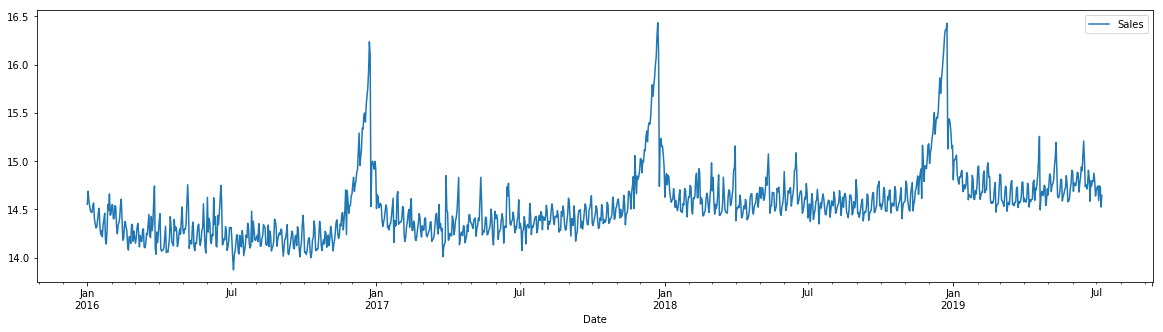

In [15]:
df2_temp = np.log(df2+1)
df2_temp.plot(figsize=(20,5))
plt.plot()

#### Sqaure-Root Transformation

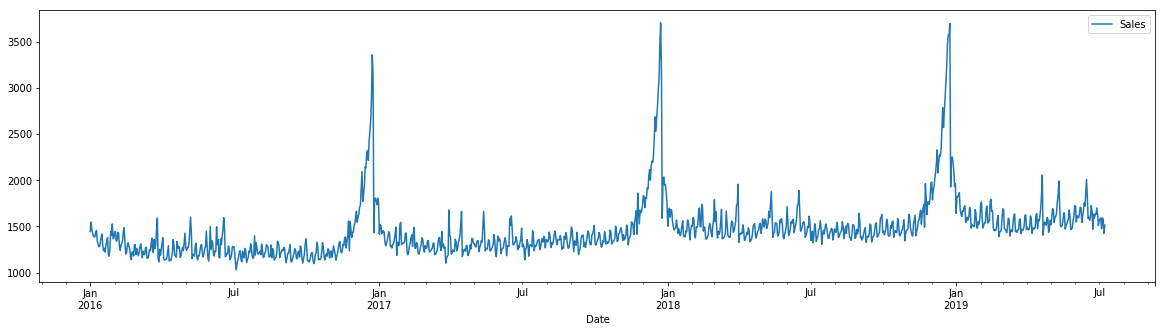

In [16]:
df3 = df.copy()
df3_temp = np.sqrt(df3+1)
df3_temp.plot(figsize=(20,5))

#### Annual Seasonality Treatment + Differencing/Transformation (Selective Transformation)

- Difference of Means

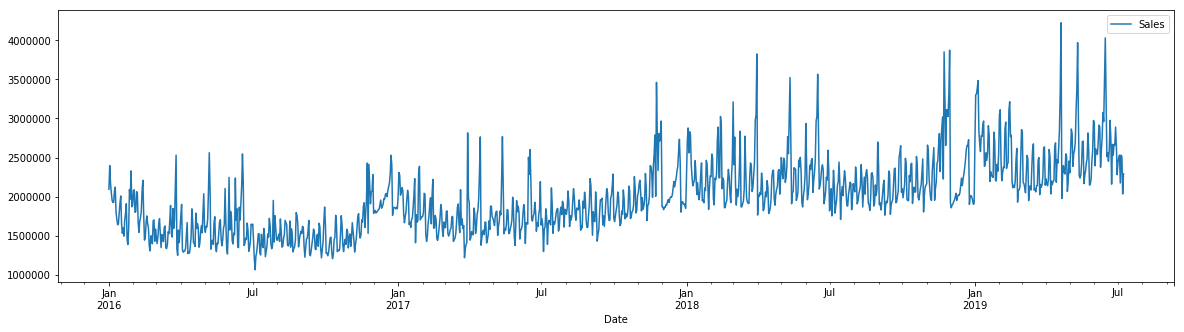

In [17]:
df4 = df.copy()

y_mean_11 = df[(df.index.month<12) & (df.index.year==2016)].mean()
y_mean_12 = df[(df.index.month==12) & (df.index.year==2016)].mean()
ratio = y_mean_11/y_mean_12

df4.Sales[df4.index.month==12] = df4.Sales[df4.index.month==12].apply(lambda x: int(y_mean_11) + x/12)
df4.plot(figsize=(20,5))
plt.show()

- Adjusted Scaling

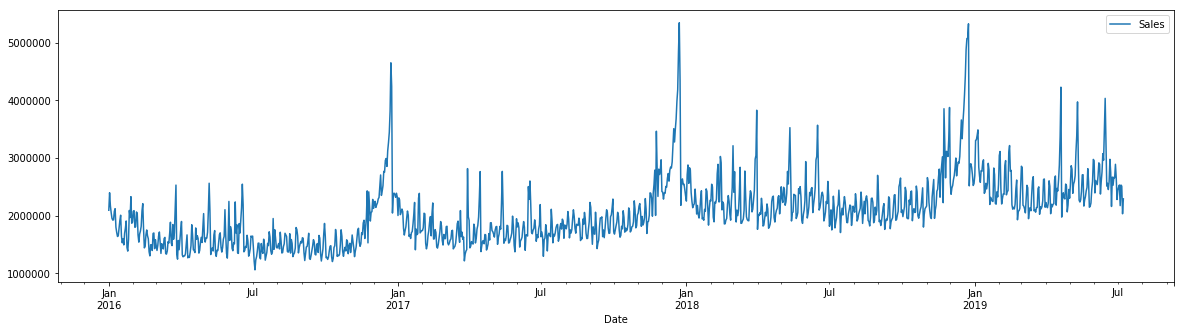

In [18]:
df5 = df.copy()

x_min = df5[(df5.index.year==2016) & (df5.index.month==12)].min()[0]
ratio = (df5[df5.index.month==11].max()/df5[df5.index.month==12].max())[0]

def scale(x,i):
    x = x - x_min
    if i < 0:
        x = x * ratio
    else:
        x = x / ratio
    x = x + x_min
    return x

df5.Sales[df5.index.month==12] = df5.Sales[df5.index.month==12].apply(lambda x: scale(x,-1)) # Down Scaling Data
df5.plot(figsize=(20,5))
plt.show()

#### Compare with previous data

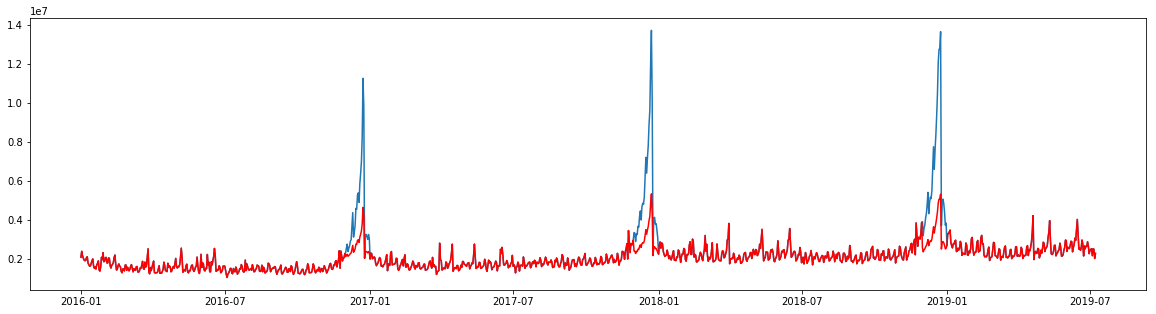

In [19]:
plt.figure(figsize=(20,5))
plt.plot(df)
plt.plot(df5, color='red')
plt.show()

### Stationary Data (Identification and Differencing)

- Identification

In [20]:
from statsmodels.tsa.stattools import adfuller

def check_stationary(df_column):
    values = adfuller(df_column)
    lables = ['ADF Stattistics', 'p-Value', 'Lags Used', 'Observations']
    for label, value in zip(lables, values):
        print(label, ':', str(value))
    
    if values[1] <= 0.05:
        print('Data Information : Stationary Data')
        return 1
    else:
        print('Data Information : Non-Stationary Data')
        return 0

check_stationary(df5.Sales)

ADF Stattistics : -2.735031302202679
p-Value : 0.06817000545212576
Lags Used : 21
Observations : 1263
Data Information : Non-Stationary Data


0

- First Order Differencing

ADF Stattistics : -10.991183247432652
p-Value : 7.053188976133743e-20
Lags Used : 20
Observations : 1263
Data Information : Stationary Data
Lag found = 1


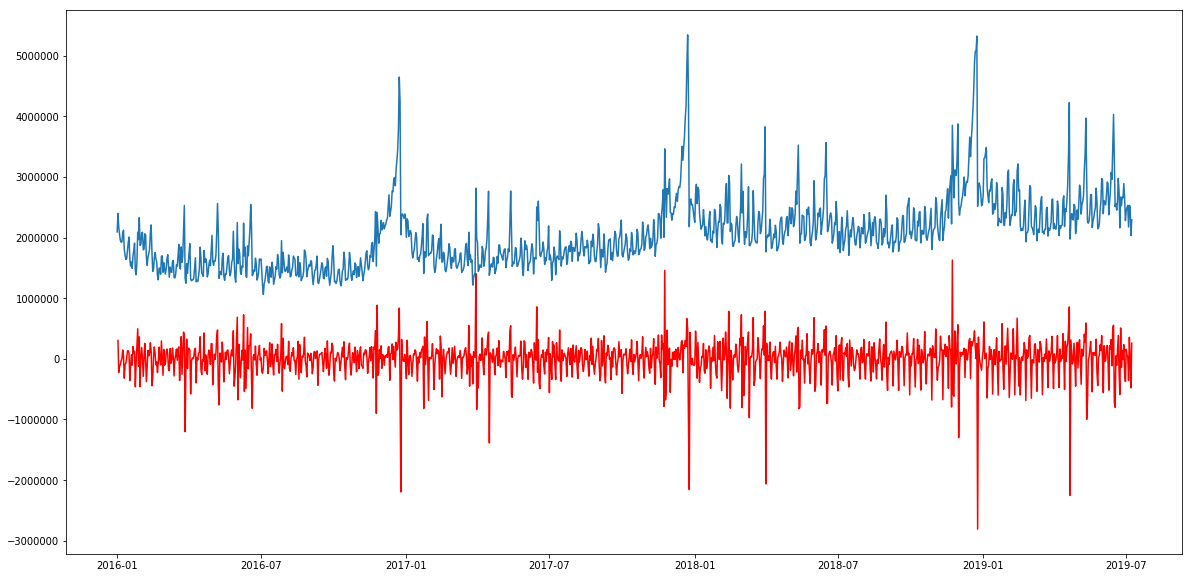

In [21]:
d_value = 1
while True:    
    df5s = df5.diff(periods=d_value)        
    if check_stationary(df5s[d_value:].Sales) == 1: # Stationary
        break
    d_value += 1
    
    if d_value > 366:
        print('Annual Limit Crossed !!')
        break

print('Lag found =', d_value)

df5s = df5.diff(periods=d_value)

plt.figure(figsize=(20,10))
plt.plot(df5)
plt.plot(df5s, color='red')
plt.show()

### Predictive Modeling

In [22]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

def find_pdq(dfs):
    best_aic = 9999999999
    p_, q_ = 1, 1
    for p in range(1,10):
        for q in range(1,10):
            s_arima_model = sm.tsa.statespace.SARIMAX(dfs.Sales, order=(p,1,q), seasonal_orders=(p,1,q,1))
            s_arima_fit = s_arima_model.fit()
            if s_arima_fit.aic < best_aic:
                best_aic = s_arima_fit.aic
                p_, q_   = p, q
    return p_, q_

def predict(dfs, p, q, start_point, end_point):
    s_arima_model = sm.tsa.statespace.SARIMAX(dfs, order=(p,1,q), seasonal_orders=(p,1,q,1))
    s_arima_fit = s_arima_model.fit()    
    y_pred = s_arima_fit.predict(start = start_point, end = end_point)#dynamic=True
    return y_pred



In [23]:
def get_aic(dfs, p, q):    
    s_arima_model = sm.tsa.statespace.SARIMAX(dfs.Sales, order=(p,1,q), seasonal_orders=(p,1,q,1))
    s_arima_fit = s_arima_model.fit()
    return s_arima_fit.aic

# Out of (4,1), (6,2), (8,2), (9,3), (12,2) :  (12,2) have Lowest AIC Score
get_aic(df5, 12, 2)

D:\anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda_install\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


35638.56225417943

In [24]:
s_arima_model = sm.tsa.statespace.SARIMAX(df5, order=(12,1,2), seasonal_orders=(12,1,2,1))
s_arima_fit = s_arima_model.fit()    
y_pred = s_arima_fit.predict(start = 10, end = 1285)#dynamic=True

D:\anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda_install\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [25]:
df_pred = pd.DataFrame(y_pred, columns=['Sales'])
df_pred.head(3)

,Sales
2016-01-11,1.712612e+06
2016-01-12,1.706289e+06
2016-01-13,1.541809e+06


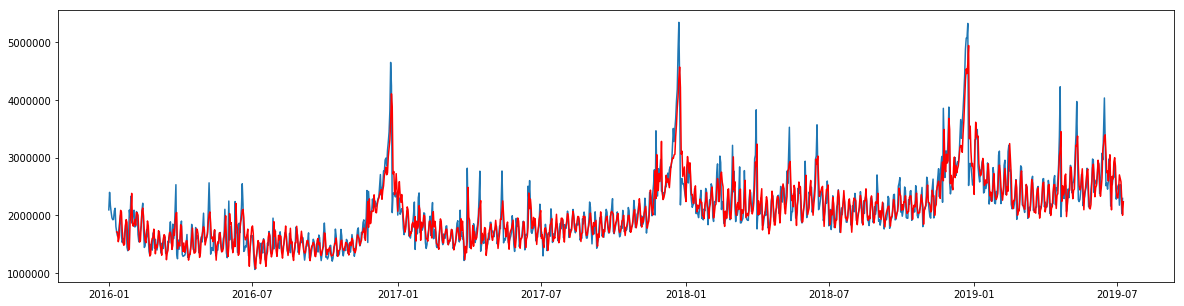

In [26]:
plt.figure(figsize=(20,5))
plt.plot(df5)
plt.plot(df_pred, color='red')
plt.show()

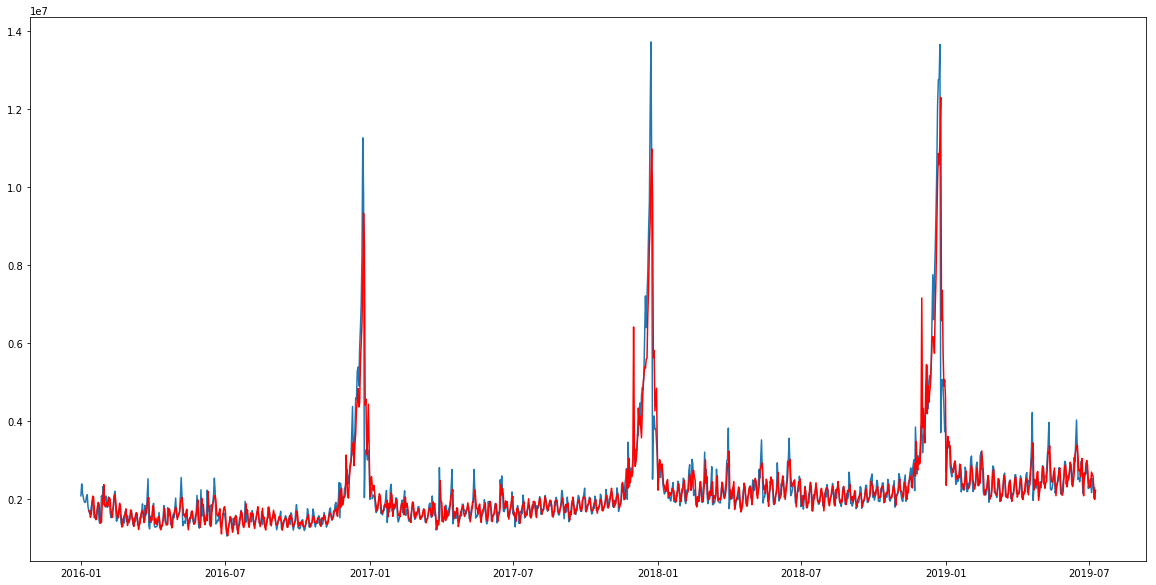

In [27]:
df_pred.Sales[df_pred.index.month==12] = df_pred.Sales[df_pred.index.month==12].apply(lambda x: scale(x, 1))

plt.figure(figsize=(20,10))
plt.plot(df)
plt.plot(df_pred, color='red')
plt.show()

### Future Dates

In [29]:
# Future Predictions
from pandas.tseries.offsets import DateOffset

temp_df = df.copy()

number_of_days_in_future = 176 # End of 2019
future_dates = [temp_df.index[-1]+DateOffset(months=x) for x in range(number_of_days_in_future)]
future_dates = pd.DataFrame(index=future_dates[1:],columns=['a'])#columns = df.columns)
future_dataset = pd.concat([temp_df, future_dates])
future_dataset.head(5)


,Sales,a
2016-01-01,2093576.0,NaN
2016-01-02,2397260.0,NaN
2016-01-03,2173039.0,NaN
2016-01-04,2051240.0,NaN
2016-01-05,1954117.0,NaN


D:\anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda_install\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


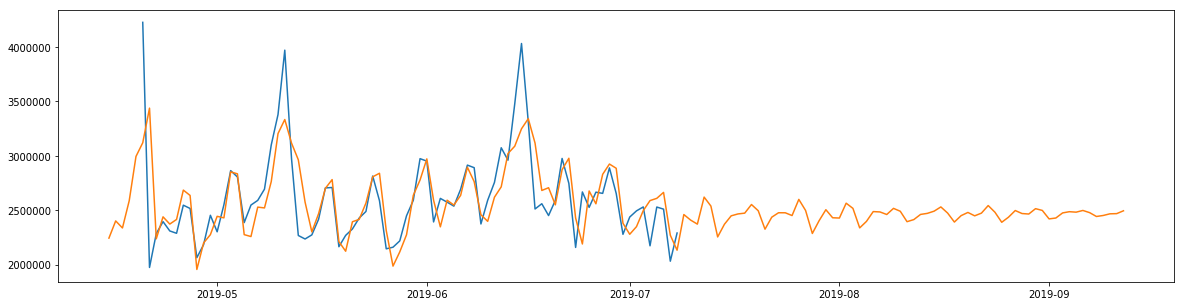

In [111]:
s_arima_model = sm.tsa.statespace.SARIMAX(df5, order=(25,1,4), seasonal_orders=(5,1,0,1))
s_arima_fit = s_arima_model.fit()    

plt.figure(figsize=(20,5))
plt.plot(df5.Sales[-80:,])
plt.plot(s_arima_fit.predict(start = 1200, end = 1350))
plt.show()

D:\anaconda_install\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
D:\anaconda_install\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


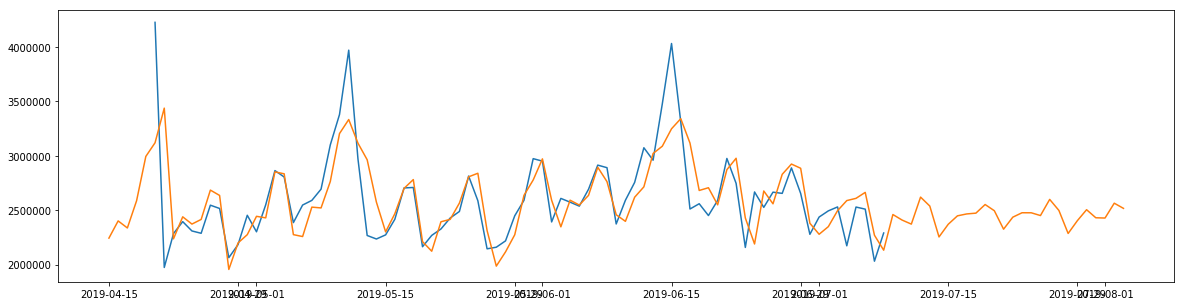

In [124]:
s_arima_model = sm.tsa.statespace.SARIMAX(df5, order=(25,1,4), seasonal_orders=(25,1,4,1))
s_arima_fit = s_arima_model.fit()    

plt.figure(figsize=(20,5))
plt.plot(df5.Sales[-80:,])
plt.plot(s_arima_fit.predict(start = 1200, end = 1310))
plt.show()